In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
folder_name = "/content/drive/My Drive/Colab Notebooks/Machine_Learning_IF6/01_Adult_Klasifikasi"

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append(f'{folder_name}')

Mounted at /content/drive


In [ ]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [ ]:
df =pd.read_csv(f'{folder_name}/adult.data', sep=',',names=column_names, skipinitialspace=True, na_values="?")

In [ ]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# **UNIT 2**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# **BACA INFORMASI DATASET TERKAIT MISSING VALUE**

In [ ]:
missing_values = df.isnull().sum()
print("\nJumlah missing value per colom:")
print(missing_values)


Jumlah missing value per colom:
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


# **MENGHITUNG PERSENTASE VALUE**

In [1]:
missing_percentage = (missing_values / len(df)) * 100
print("\nPersentase missing value per colom:")
print(missing_percentage)

NameError: name 'missing_values' is not defined

1. Analisi Deskriptif Variabel Numerik

In [ ]:
# Statistic deskriptif untuk variabel numerik
df.describe()

In [ ]:
# Statistic deskriptif untuk variabel kategorical
df.describe(include=['object'])

Distribusi target variabel

In [ ]:
df['income'].value_counts(normalize=True)

2. Visualisasi Distribusi

In [ ]:
# Histogram untuk variabel numerik
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

Variabel kategori menggunakan Bar Plor

In [ ]:
# Bar plot untuk variabel kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
for features in categorical_features:
  plt.figure(figsize=(20, 5))
  df[features].value_counts().plot(kind='bar')
  plt.title(f'Distibution of {features}')
  plt.ylabel('Count')
  plt.xlabel(features)
  plt.xticks(rotation=45)
  plt.show()

# Analisis Korelasi

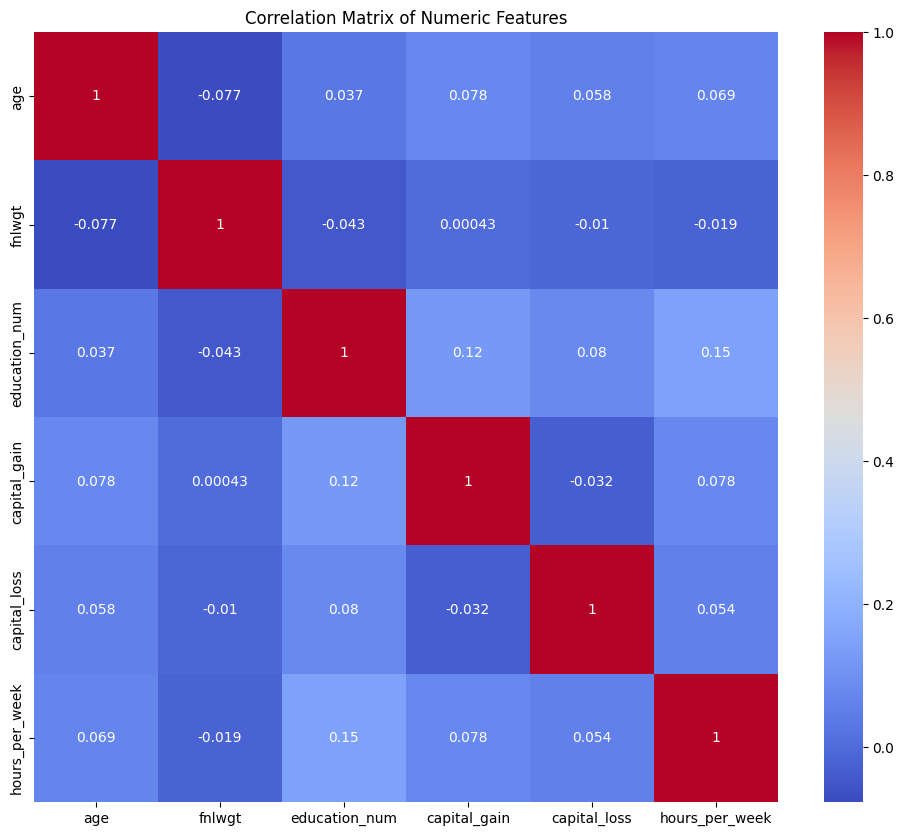

In [ ]:
# Koreksi antara variabel numerik
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# 4. Analisis Hubungan dengan Variabel Target

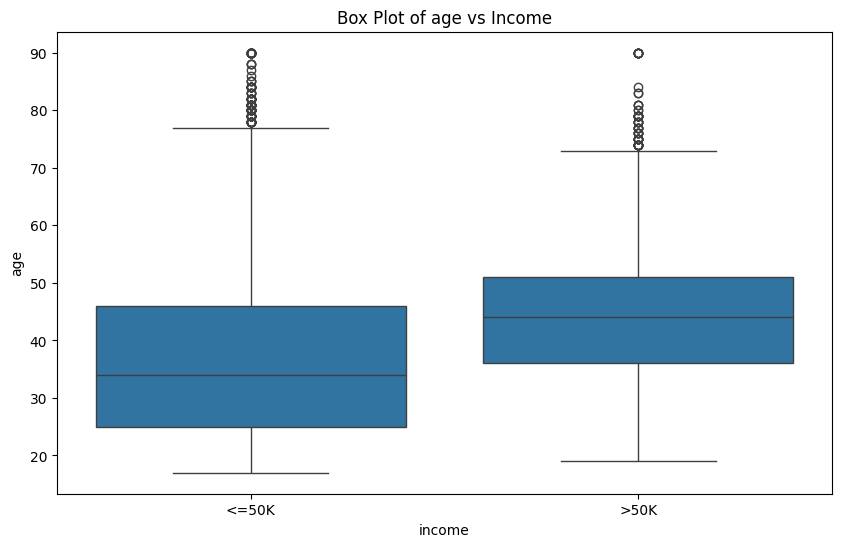

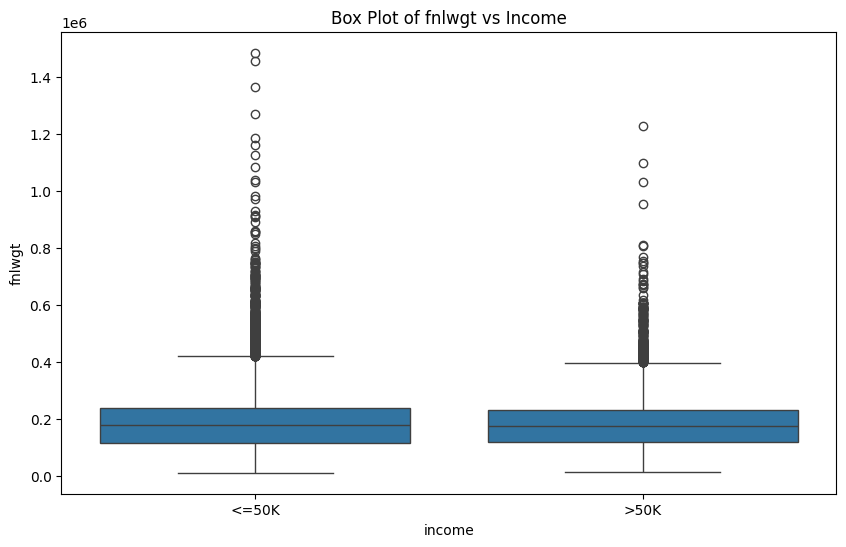

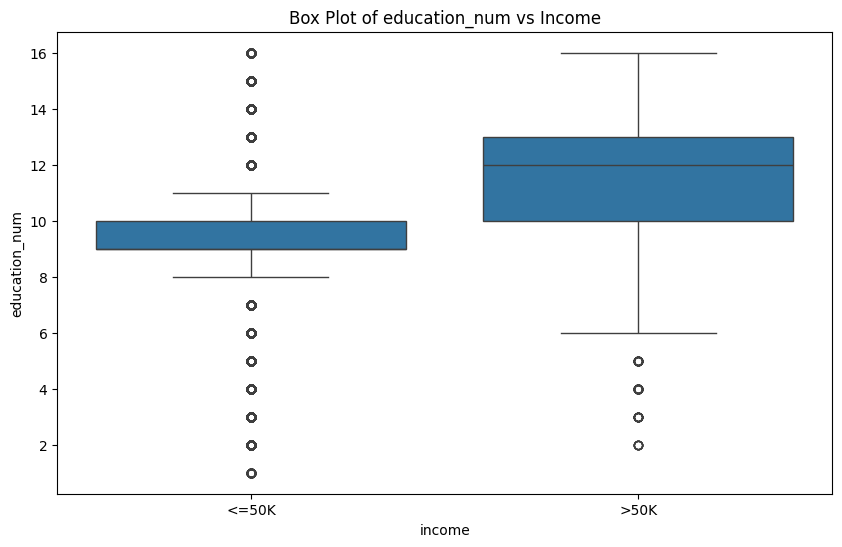

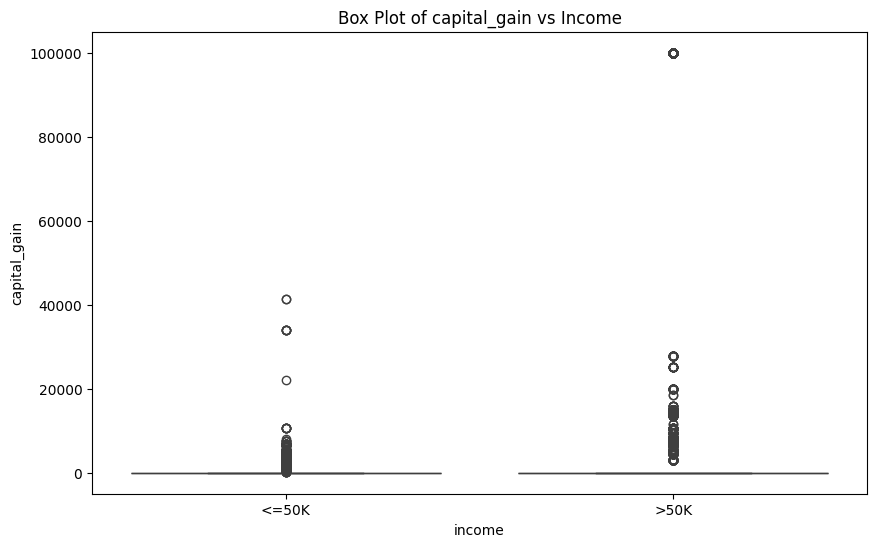

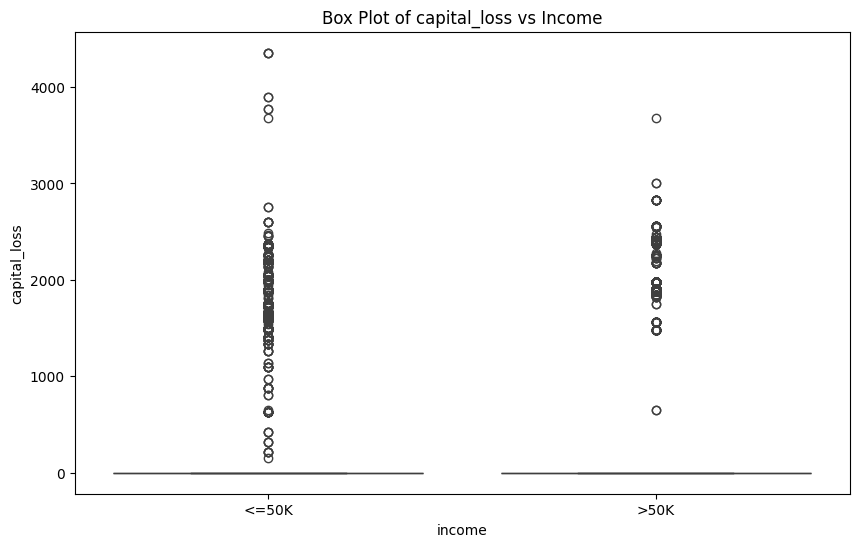

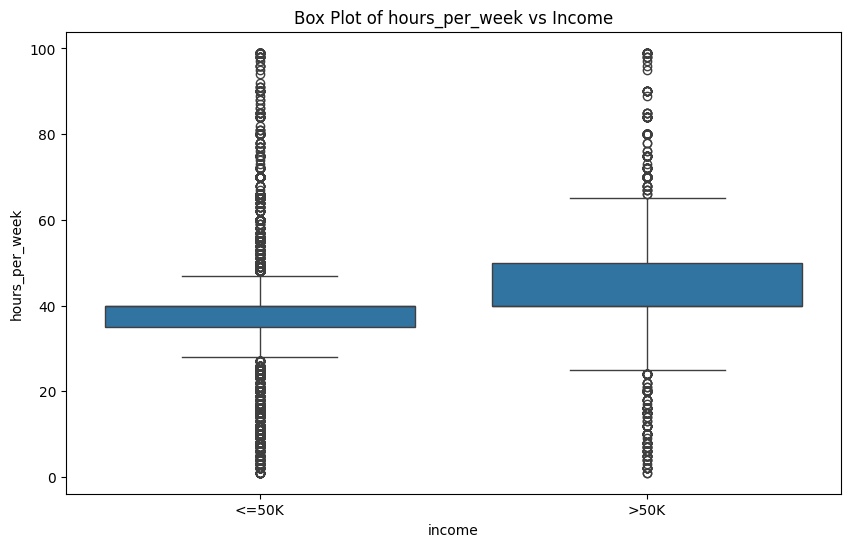

In [ ]:
# Box numerik vs target
for feature in numeric_features:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='income', y=feature, data=df)
  plt.title(f'Box Plot of {feature} vs Income')
  plt.show()

<Figure size 1200x600 with 0 Axes>

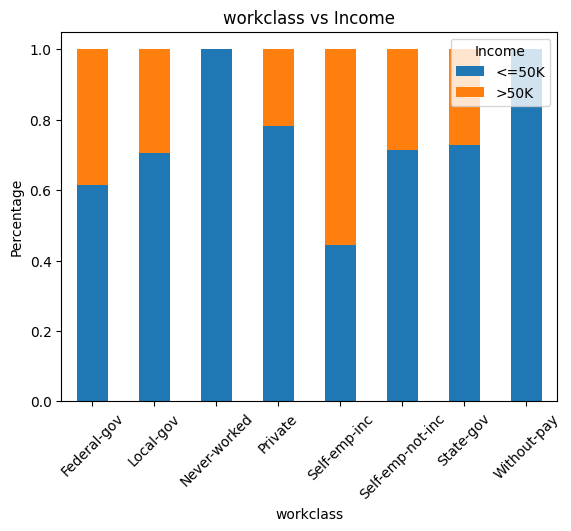

<Figure size 1200x600 with 0 Axes>

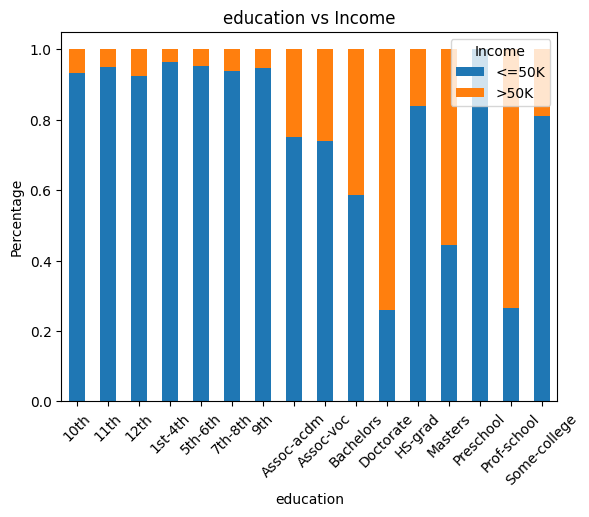

<Figure size 1200x600 with 0 Axes>

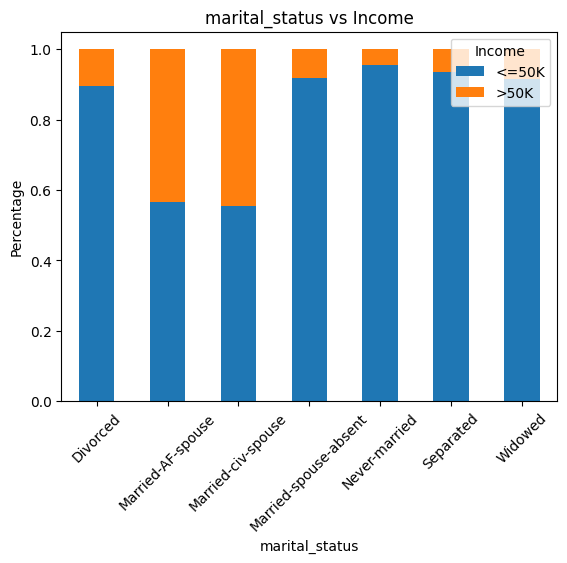

<Figure size 1200x600 with 0 Axes>

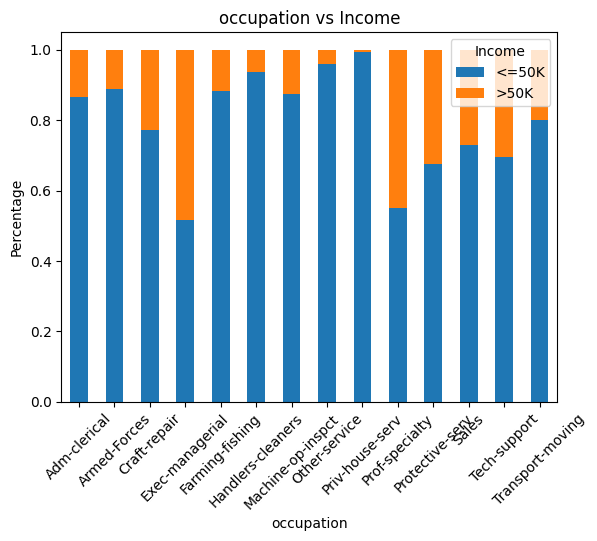

<Figure size 1200x600 with 0 Axes>

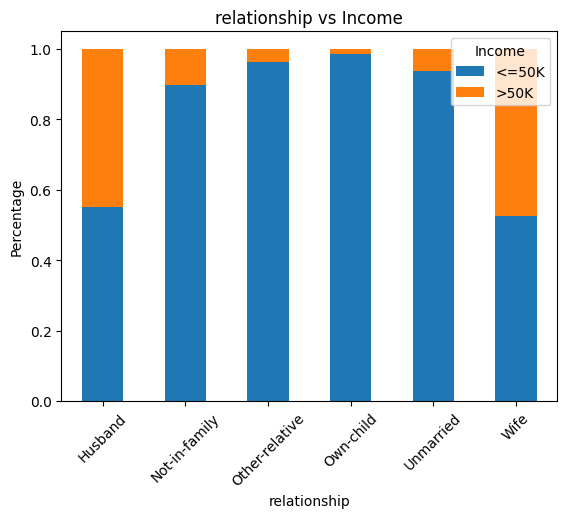

<Figure size 1200x600 with 0 Axes>

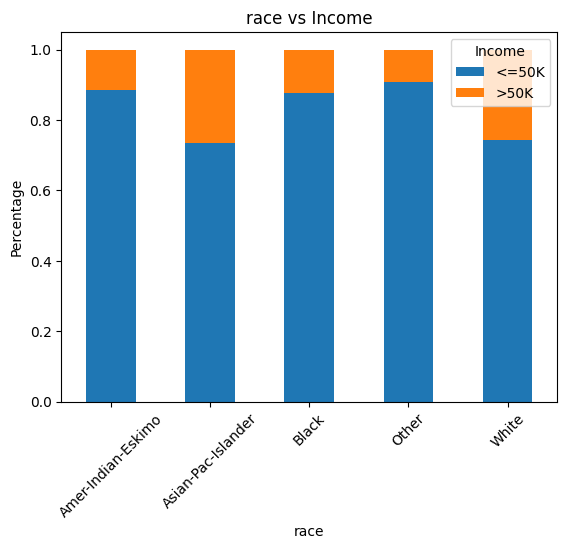

<Figure size 1200x600 with 0 Axes>

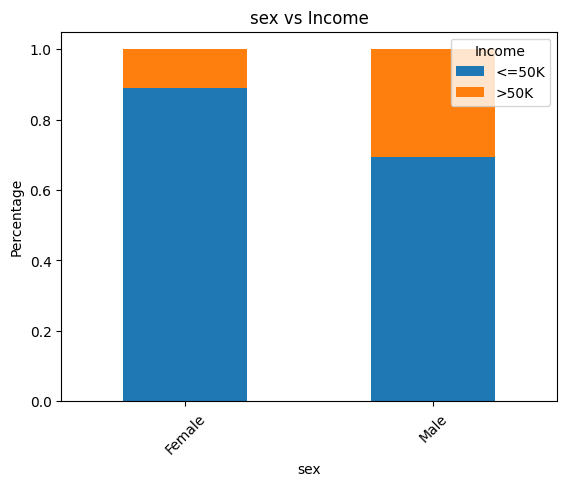

<Figure size 1200x600 with 0 Axes>

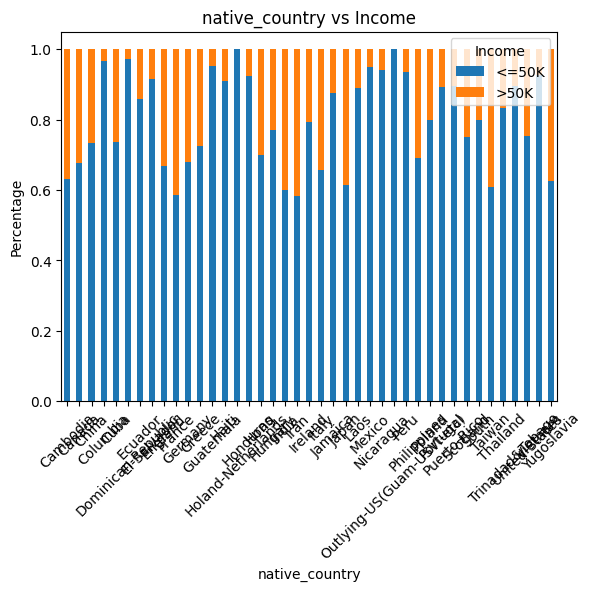

In [ ]:
# Stacked bar plot kategorikal vs target
for feature in categorical_features:
 if feature != 'income':
  plt.figure(figsize=(12, 6))
  df_temp = df.groupby([feature, 'income']).size().unstack()
  df_temp_perc = df_temp.div(df_temp.sum(axis=1), axis=0)
  df_temp_perc.plot(kind='bar', stacked=True)
  plt.title(f'{feature} vs Income')
  plt.xlabel(feature)
  plt.ylabel('Percentage')
  plt.legend(title='Income', loc='upper right')
  plt.xticks(rotation=45)
  plt.show()

# Identifikasi Outlier

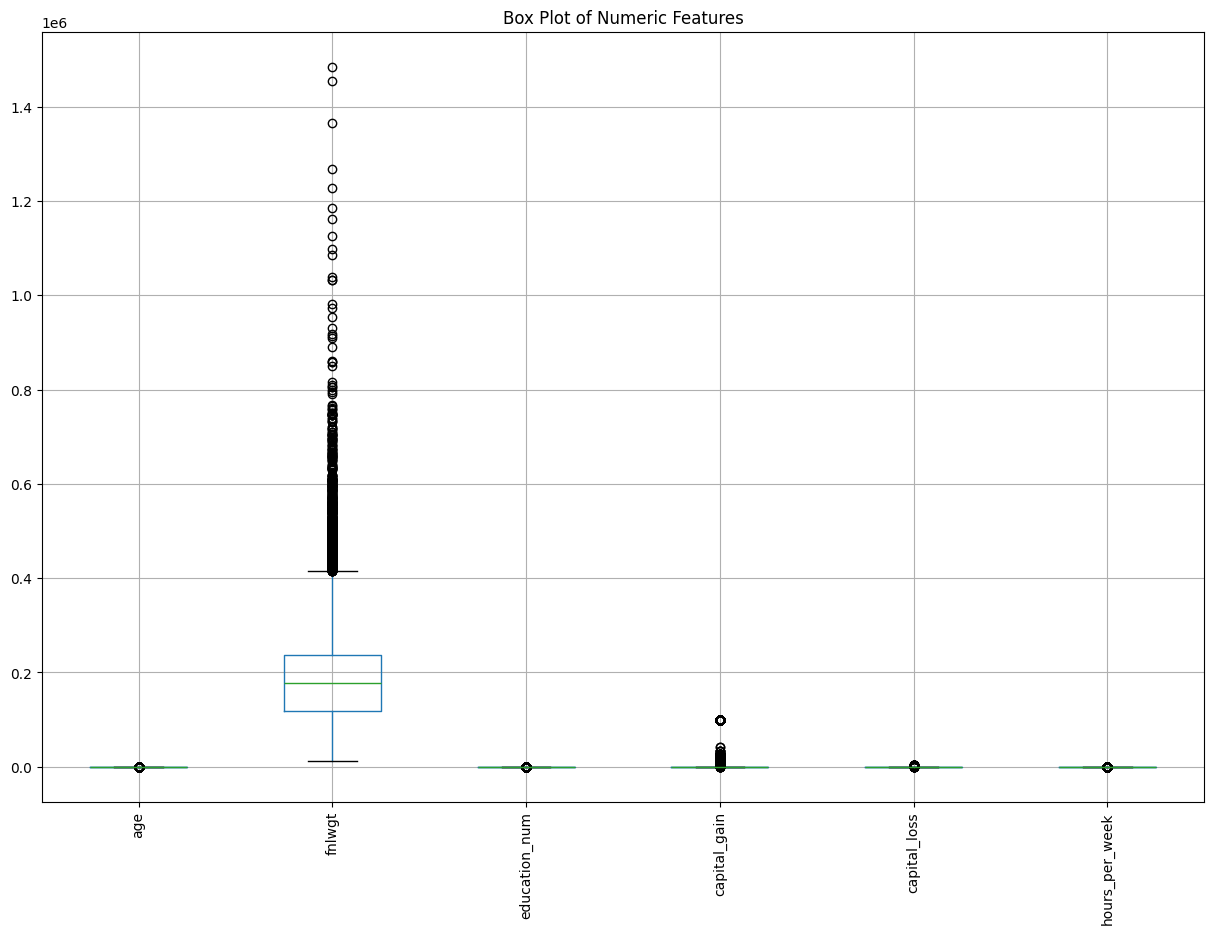

In [ ]:
# Box plot untuk mendeteksi outlier pada variabel numerik
plt.figure(figsize=(15, 10))
df[numeric_features].boxplot()
plt.title('Box Plot of Numeric Features')
plt.xticks(rotation=90)
plt.show()

# Unit 3: Memvalidasi Data


In [ ]:
# Hitung jumlah missing values
missing_values = df.isnull().sum()

# Hitung persentase missing values
missing_percentage = 100 * df.isnull().sum() / len(df)

# Gabungkan informasi missing values
missing_table =pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent'])

print(missing_table)

                Total   Percent
age                 0  0.000000
workclass        1836  5.638647
fnlwgt              0  0.000000
education           0  0.000000
education_num       0  0.000000
marital_status      0  0.000000
occupation       1843  5.660146
relationship        0  0.000000
race                0  0.000000
sex                 0  0.000000
capital_gain        0  0.000000
capital_loss        0  0.000000
hours_per_week      0  0.000000
native_country    583  1.790486
income              0  0.000000


# Visualisasi Missing Values


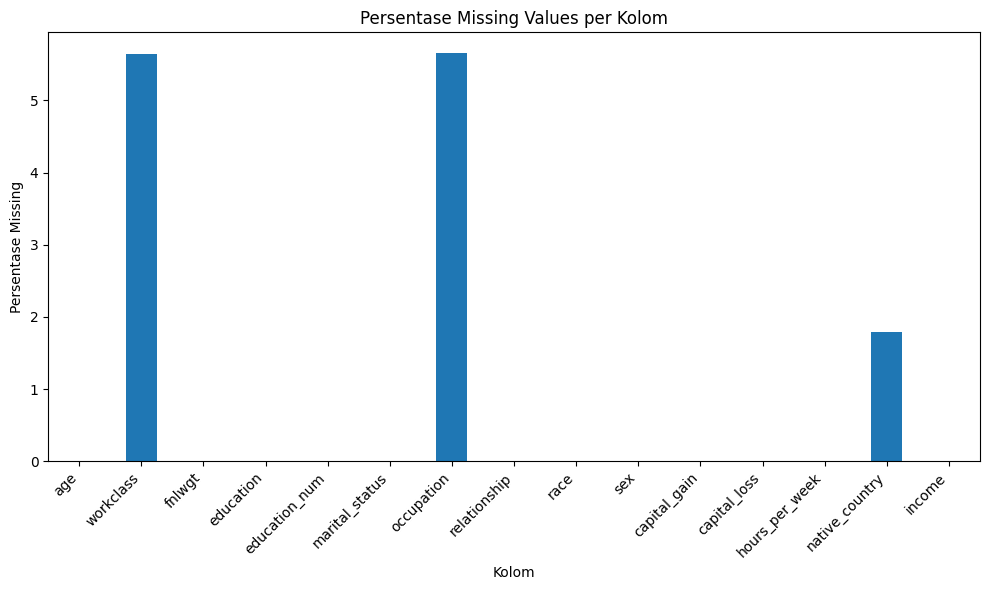

In [ ]:
# Visualisasi missing values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Persentase Missing Values per Kolom')
plt.xlabel('Kolom')
plt.ylabel('Persentase Missing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Periksa Duplikat

In [ ]:
# Hitung jumlah duplikat
duplicates = df.duplicated().sum()
print(f'Jumlah duplikat: {duplicates}')

# Tampilkan beberapa baris duplikat (jika ada)
if duplicates > 0:
  print('Sampel data duplikat:')
  print(df[df.duplicated(keep=False)].head())

Jumlah duplikat: 24
Sampel data duplikat:
      age workclass  fnlwgt     education  education_num marital_status  \
2303   90   Private   52386  Some-college             10  Never-married   
3917   19   Private  251579  Some-college             10  Never-married   
4325   25   Private  308144     Bachelors             13  Never-married   
4767   21   Private  250051  Some-college             10  Never-married   
4881   25   Private  308144     Bachelors             13  Never-married   

          occupation   relationship                race     sex  capital_gain  \
2303   Other-service  Not-in-family  Asian-Pac-Islander    Male             0   
3917   Other-service      Own-child               White    Male             0   
4325    Craft-repair  Not-in-family               White    Male             0   
4767  Prof-specialty      Own-child               White  Female             0   
4881    Craft-repair  Not-in-family               White    Male             0   

      capital_loss  

# Validasi Tipe Data

In [ ]:
# Taampilkan tipe data setiap kolom
print(df.dtypes)

# Periksa apakah ada nilai nom-numerik dalam kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
  non_numeric_values = df[pd.to_numeric(df[column], errors='coerce').isna()]
  if len(non_numeric_values) > 0:
    print(f"\nNilai non-numerik dalam kolom {column}:")
    print(non_numeric_values[column].unique())

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


# Validasi Nilai Range

In [ ]:
# Periksa range nilai untuk kolom numerik
for col in numeric_columns:
  print(f"\nRange nilai untuk (col):")
  print(f"Min: {df[col].min()}, Max: {df[col].max()}")

# Periksa kategori unik untuk kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
  print(f"\nKategori unik untuk {col}:")
  print(df[col].unique())


Range nilai untuk (col):
Min: 17, Max: 90

Range nilai untuk (col):
Min: 12285, Max: 1484705

Range nilai untuk (col):
Min: 1, Max: 16

Range nilai untuk (col):
Min: 0, Max: 99999

Range nilai untuk (col):
Min: 0, Max: 4356

Range nilai untuk (col):
Min: 1, Max: 99

Kategori unik untuk workclass:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Kategori unik untuk education:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Kategori unik untuk marital_status:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Kategori unik untuk occupation:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Pro

# Periksa Konsistensi Data

In [ ]:
# Contoh Periksa Konsistensi anatar 'education' dan 'education_num'
education_mapping = df.groupby('education')['education_num'].mean().sort_values()
print("\nPemetaan rata-rata 'education_num' untuk setiap 'eduaction':")
print(education_mapping)


Pemetaan rata-rata 'education_num' untuk setiap 'eduaction':
education
Preschool        1.0
1st-4th          2.0
5th-6th          3.0
7th-8th          4.0
9th              5.0
10th             6.0
11th             7.0
12th             8.0
HS-grad          9.0
Some-college    10.0
Assoc-voc       11.0
Assoc-acdm      12.0
Bachelors       13.0
Masters         14.0
Prof-school     15.0
Doctorate       16.0
Name: education_num, dtype: float64


# Visualisasi Konsistensi

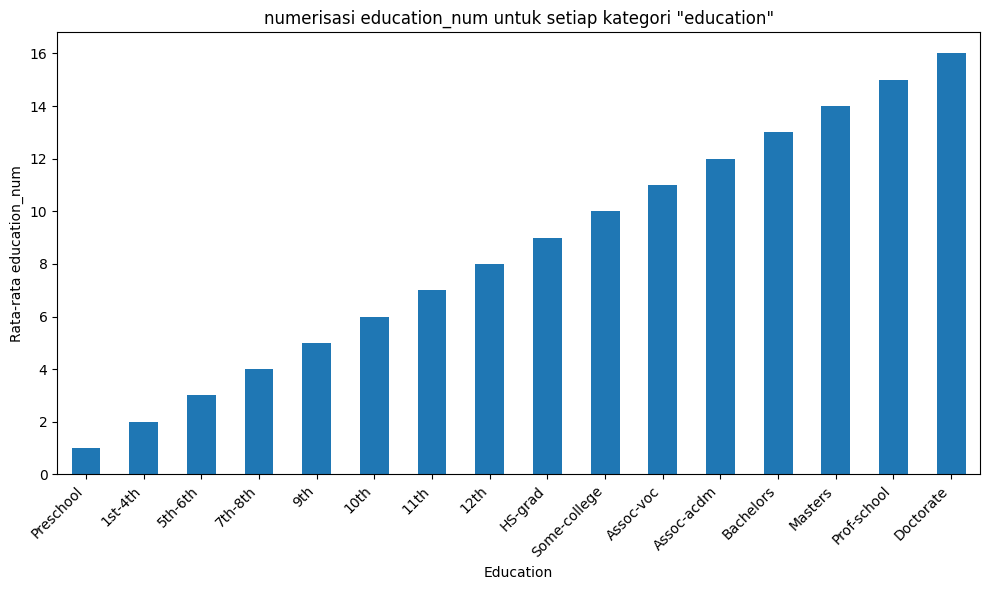

In [ ]:
# Visualisasi Konsistensi
plt.figure(figsize=(10, 6))
education_mapping.plot(kind='bar')
plt.title('numerisasi education_num untuk setiap kategori "education"')
plt.xlabel('Education')
plt.ylabel('Rata-rata education_num')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**UNIT 5 DATA CLEANING**

In [ ]:
#Cek missing value
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

#Menangani missing values
for column in df.columns:
  if df[column].dtype == 'object':
    #Untuk kolom kategorical,   isi dengan modus
    df[column].fillna(df[column].mode()[0], inplace=True)
  else:
    #Untuk kolom numerik, isi dengan median
    df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())

Missing values sebelum pembersihan:
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Missing values setelah pembersihan:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


<ipython-input-27-86a3aec37449>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-27-86a3aec37449>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

**Menangani Outlier**

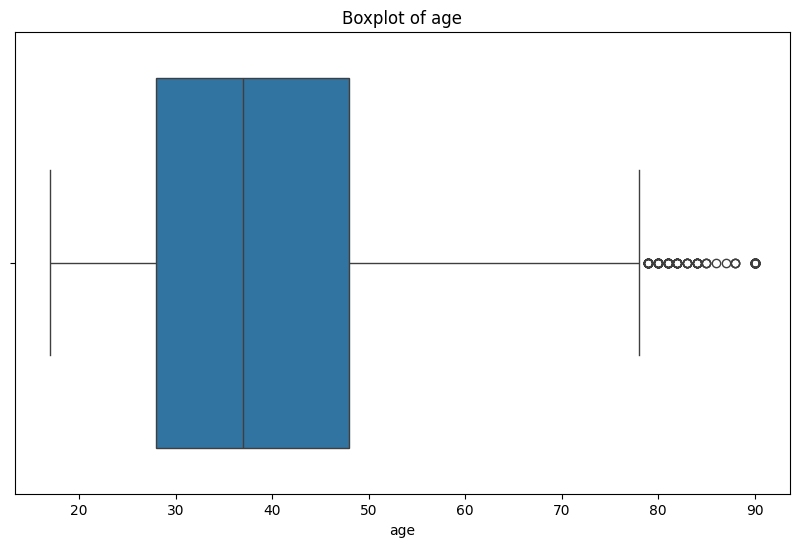

Outliers pada age sudah dihandel.


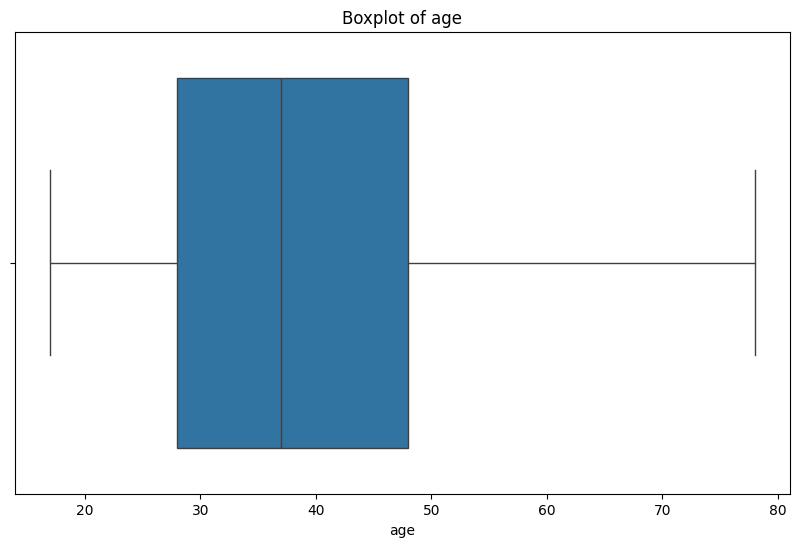

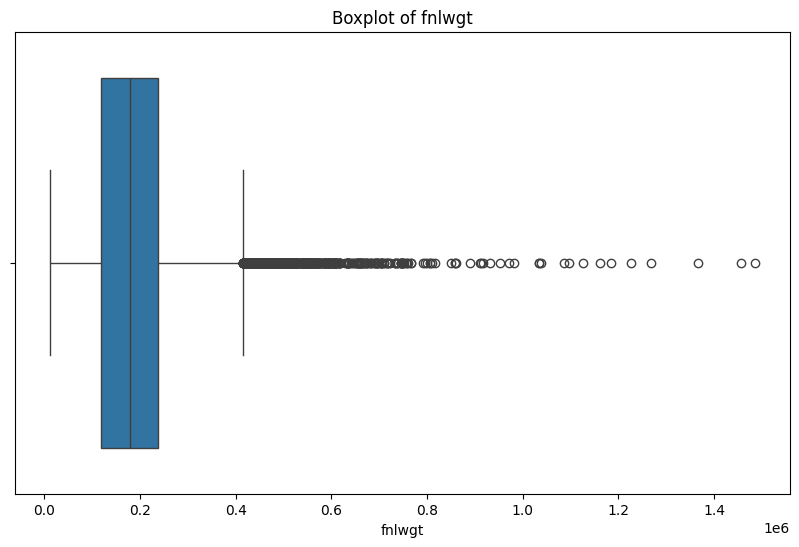

Outliers pada fnlwgt sudah dihandel.


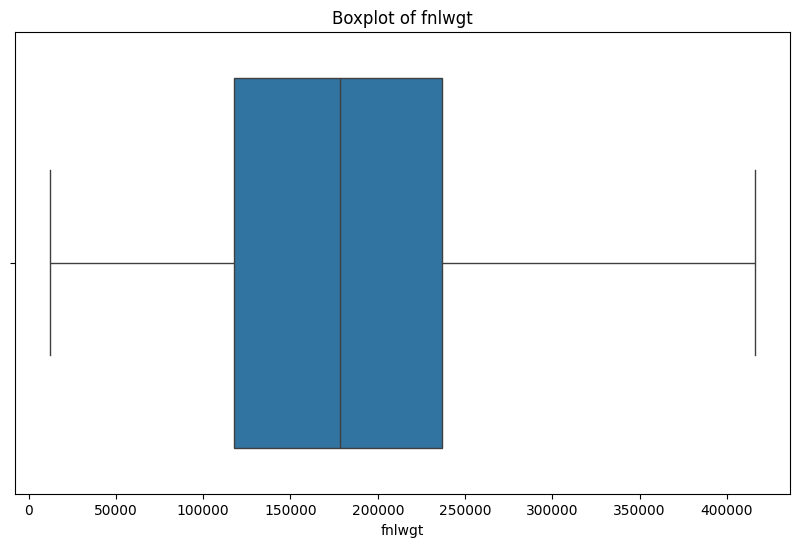

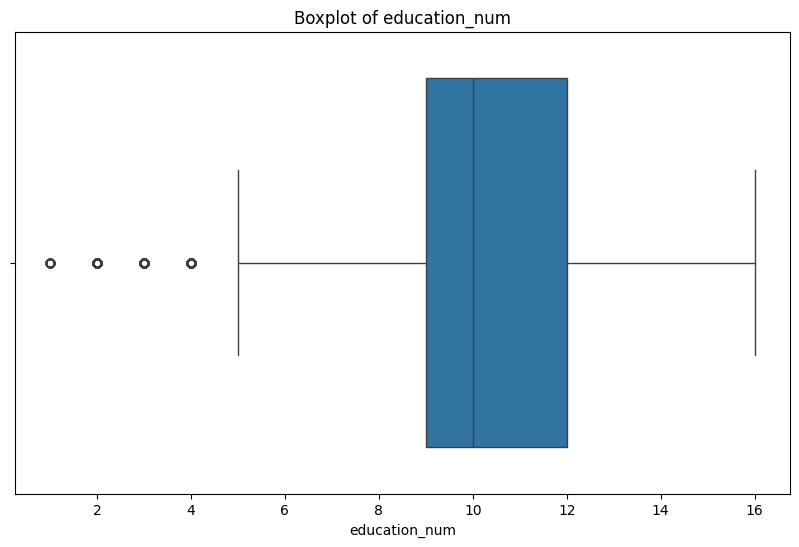

Outliers pada education_num sudah dihandel.


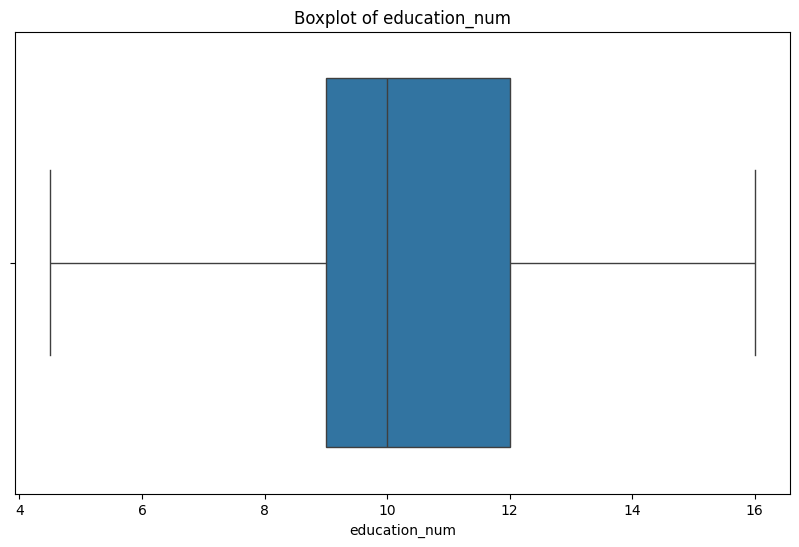

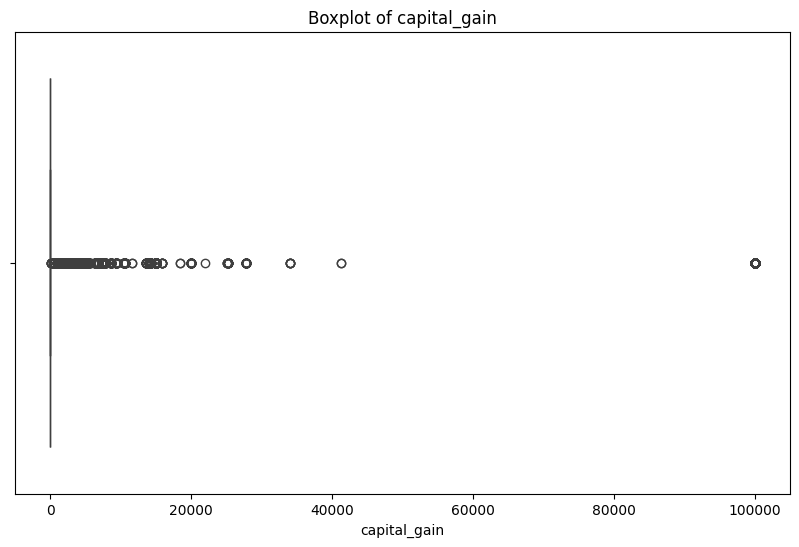

Outliers pada capital_gain sudah dihandel.


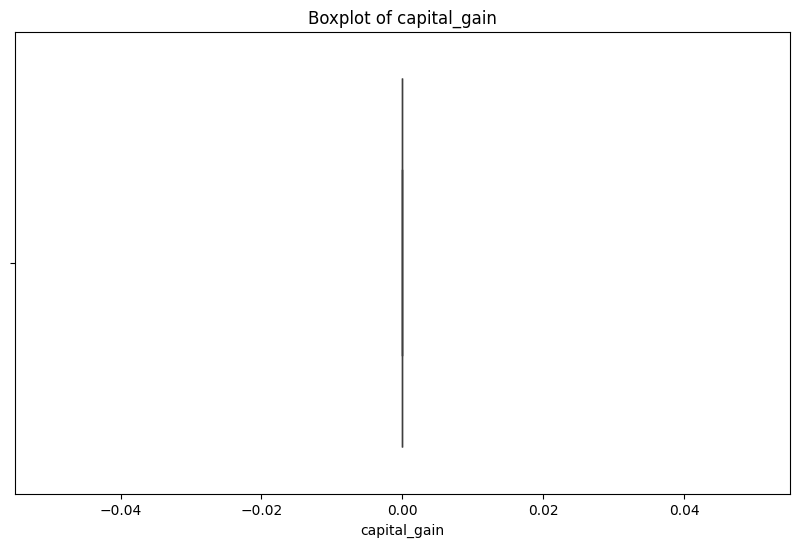

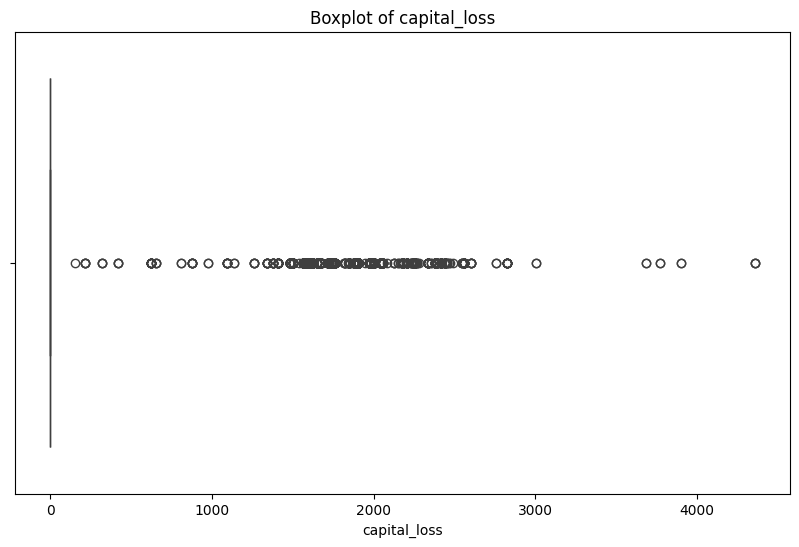

Outliers pada capital_loss sudah dihandel.


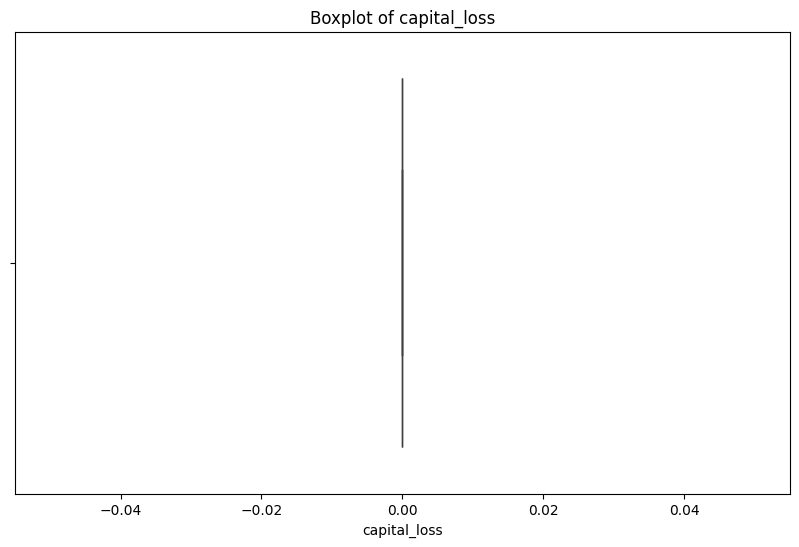

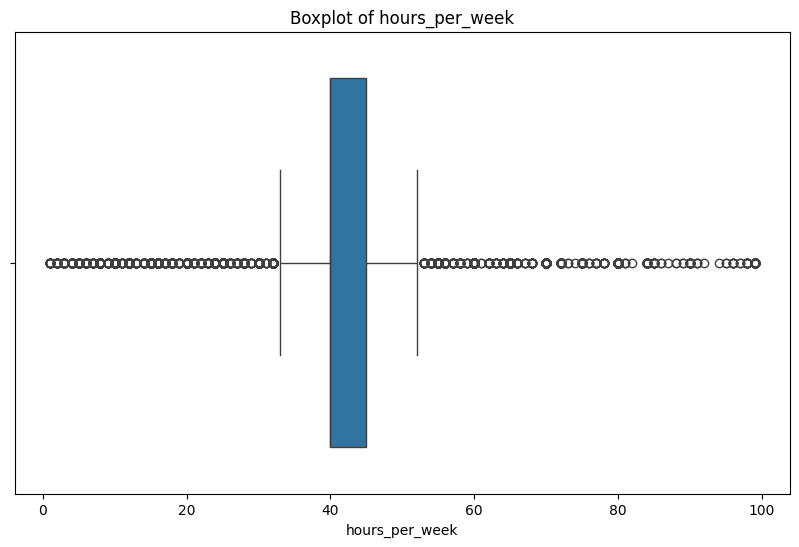

Outliers pada hours_per_week sudah dihandel.


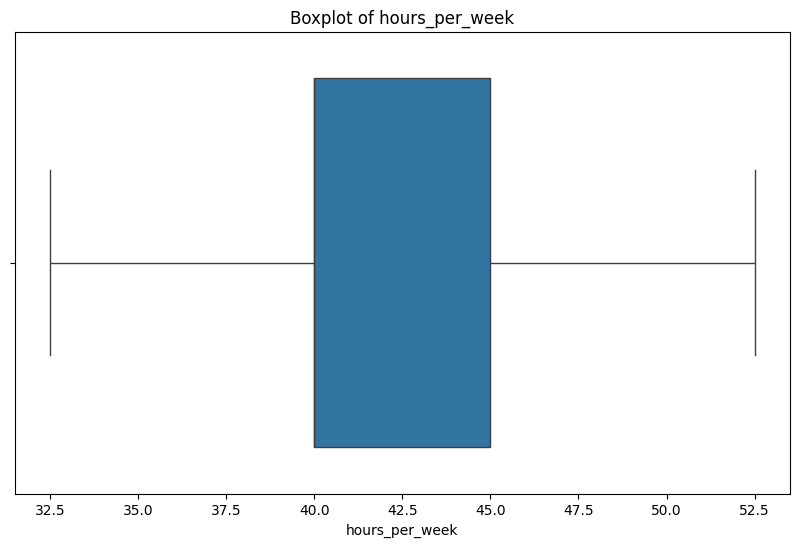

In [ ]:
def plot_boxplot(df, column):
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()

  #Contoh untuk kolom numerik
  numeric_columns = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
  plot_boxplot(df, column)

  #Menangani outlier dengan IQR method
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[column] = np.where(df[column] > upper_bound, upper_bound, np.where(df[column] < lower_bound, lower_bound, df[column]))

  print(f"Outliers pada {column} sudah dihandel.")
  plot_boxplot(df, column)

**Menangani Duplikat**

In [ ]:
#Cek duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

#Hapus duplikat
df.drop_duplicates(inplace=True)

print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris duplikat: 53
Jumlah baris setelah menghapus duplikat: 32508


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32508 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32508 non-null  float64
 1   workclass       32508 non-null  object 
 2   fnlwgt          32508 non-null  float64
 3   education       32508 non-null  object 
 4   education_num   32508 non-null  float64
 5   marital_status  32508 non-null  object 
 6   occupation      32508 non-null  object 
 7   relationship    32508 non-null  object 
 8   race            32508 non-null  object 
 9   sex             32508 non-null  object 
 10  capital_gain    32508 non-null  float64
 11  capital_loss    32508 non-null  float64
 12  hours_per_week  32508 non-null  float64
 13  native_country  32508 non-null  object 
 14  income          32508 non-null  object 
dtypes: float64(6), object(9)
memory usage: 4.0+ MB


**Validasi Hasil Pembersihan**

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


**Menyimpan Dataset yang sudah dibersihkan**

In [ ]:
#Simpan data yang telah dibersihkan
sys.path.append(f'{folder_name}')
df.to_csv(f'{folder_name}/adult_income_cleaned.csv', index=False)
print("Data yang telah dibersihkan telah disimpan sebagai 'adult_income_cleaned.csv'")

Data yang telah dibersihkan telah disimpan sebagai 'adult_income_cleaned.csv'


**UNIT 6: REKONSTRUCTION**

In [ ]:
# Membuat fitur baru berdasarkan usia
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100], labels=
['Remaja', 'Dewasa Muda', 'Dewasa', 'Paruh Baya', 'Lansia'])

# Menggabungkan capital gain dan loss
df['net_capital'] = df['capital_gain'] - df['capital_loss']

# Membuat fitur rasio jam kerja terhadap rata-rata
df['work_hour_ratio'] = df['hours_per_week'] / df['hours_per_week'].mean()

# Membuat fitur kategorikal baru berdasarkan education_num
df['education_level'] = pd.cut(df['education_num'], bins=[0, 8, 12, 16, 20],
labels=['Dasar', 'Menengah', 'Sarjana', 'Pascasarjana'])

print(df[['age_group', 'net_capital', 'work_hour_ratio', 'education_level']].
head())

     age_group  net_capital  work_hour_ratio education_level
0       Dewasa          0.0         0.970669         Sarjana
1   Paruh Baya          0.0         0.788668         Sarjana
2       Dewasa          0.0         0.970669        Menengah
3   Paruh Baya          0.0         0.970669           Dasar
4  Dewasa Muda          0.0         0.970669         Sarjana


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32508 entries, 0 to 32560
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              32508 non-null  float64 
 1   workclass        32508 non-null  object  
 2   fnlwgt           32508 non-null  float64 
 3   education        32508 non-null  object  
 4   education_num    32508 non-null  float64 
 5   marital_status   32508 non-null  object  
 6   occupation       32508 non-null  object  
 7   relationship     32508 non-null  object  
 8   race             32508 non-null  object  
 9   sex              32508 non-null  object  
 10  capital_gain     32508 non-null  float64 
 11  capital_loss     32508 non-null  float64 
 12  hours_per_week   32508 non-null  float64 
 13  native_country   32508 non-null  object  
 14  income           32508 non-null  object  
 15  age_group        32508 non-null  category
 16  net_capital      32508 non-null  float64 
 17

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_group,net_capital,work_hour_ratio,education_level
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,Dewasa,0.0,0.970669,Sarjana
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K,Paruh Baya,0.0,0.788668,Sarjana
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,Dewasa,0.0,0.970669,Menengah
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,Paruh Baya,0.0,0.970669,Dasar
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,Dewasa Muda,0.0,0.970669,Sarjana


TRANSFORM DATA

In [ ]:
# Periksa kategori unik untuk kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
  print(f"\nKategori unik dalam {col}:")
  print(df[col].unique())


Kategori unik dalam workclass:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Kategori unik dalam education:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Kategori unik dalam marital_status:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Kategori unik dalam occupation:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']

Kategori unik dalam relationship:
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Kategori unik dalam race:
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

Kategori unik dalam 

In [ ]:
# Lakukan mapping data kategorikal menjadi numerik

# Workclass
workclass = {'Never-worked':0, 'Without-pay':1, 'Self-emp-inc':2, 'Local-gov':3, 'Federal-gov':4, 'State-gov':5, 'Self-emp-inc':6, 'Private':7}
df['workclass'] = df['workclass'].map(workclass)

#education tidak diproses karena sudah dimapping

# maritalstatus
maritalstatus = {'Never-married':0, 'Married-civ-spouse':1, 'Divorced':2,
'Married-spouse-absent':3, 'Widowed':4, 'Married-AF-Spouse':5, 'Separated':6}

df['marital_status'] = df['marital_status'].map(maritalstatus)

# occupation
occupation = {'Adm-clerical':1, 'Exec-managerial':2, 'Handlers-cleaners':3,
'Prof-specialty':4, 'Other-service':5, 'Sales':6, 'Craft-repair':7,
'Transport-moving':8, 'Farming-fishing':9, 'Machine-op-inspct':10,
'Tech-support':11, 'Protective-serv':12, 'Armed- Forces':13,
'Priv-house-serv':14}

df['occupation'] = df['occupation'].map(occupation)

# relationship
relationship = {'Unmarried':0, 'Not-in-family':1, 'Husband':2, 'Wife':3.,
'Own-child':4, 'Other-relative':5}

df['relationship'] = df['relationship'].map(relationship)

# race
race = {'White':1, 'Black':2, 'Asian-Pac-Islander':3, 'Amer-India-Eskimo':4,
'Other':5}

df['race'] = df['race'].map(race)

# sex
sex = {'Famale':0, 'Male':1}

df['sex'] = df['sex'].map(sex)

#nativecountry
nativecountry = {'United-State':1, 'Cuba':2, 'Jamaica':3, 'India':4,
'Mexico':5, 'South':6, 'Puerto-Rico':7, 'Hondarus':8, 'England':9, 'Canada':10,
'Germany':11, 'Iran':12, 'Philippines':13, 'Italy':14, 'Poland':15,
'Columbia':16, 'Cambodia':17, 'Thailand':18, 'Ecuador':19, 'Laos':20,
'Taiwan':21, 'Haiti':22, 'Portugal':23, 'Dominican-Republic':24,
'El-Salvador':25, 'France':26, 'Guatemala':27, 'China':28, 'Japan':29,
'Yugaslavia':30, 'Peru':31, 'Outlying-US-(Guam-USVI-etch)':32, 'Scotland':33,
'Trinadad&Tobago':34, 'Greece':35, 'Nicaragau':36, 'Vietnam':37, 'Hong':38,
'Ireland':39, 'Hungary':40, 'Holand-Netherland':41}

df['native_country'] = df['native_country'].map(nativecountry)

# income
income = {'<=50K':0, '>50K':1}

df['income'] = df['income'].map(income)

# age_group
age_group = {'Remaja':1, 'Dewasa Muda':2, 'Dewasa':3, 'Paruh Baya':4,
'Lansia':5}

df['age_group'] = df['age_group'].map(age_group)


# education_level
education_level = {'Dasar':1, 'Menengah':2, 'Sarjana':3, 'Pascasarjana':4}

df['education_level'] = df['education_level'].map(education_level)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_group,net_capital,work_hour_ratio,education_level
0,39.0,5.0,77516.0,Bachelors,13.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,40.0,NaN,0,3,0.0,0.970669,3
1,50.0,NaN,83311.0,Bachelors,13.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,32.5,NaN,0,4,0.0,0.788668,3
2,38.0,7.0,215646.0,HS-grad,9.0,2.0,3.0,1.0,1.0,1.0,0.0,0.0,40.0,NaN,0,3,0.0,0.970669,2
3,53.0,7.0,234721.0,11th,7.0,1.0,3.0,2.0,2.0,1.0,0.0,0.0,40.0,NaN,0,4,0.0,0.970669,1
4,28.0,7.0,338409.0,Bachelors,13.0,1.0,4.0,3.0,2.0,NaN,0.0,0.0,40.0,2.0,0,2,0.0,0.970669,3


In [ ]:
# kita drop education karena sudah ada educatio_num
df = df.drop('education', axis=1)

In [ ]:
df

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_group,net_capital,work_hour_ratio,education_level
0,39.0,5.0,77516.0,13.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,40.0,NaN,0,3,0.0,0.970669,3
1,50.0,NaN,83311.0,13.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,32.5,NaN,0,4,0.0,0.788668,3
2,38.0,7.0,215646.0,9.0,2.0,3.0,1.0,1.0,1.0,0.0,0.0,40.0,NaN,0,3,0.0,0.970669,2
3,53.0,7.0,234721.0,7.0,1.0,3.0,2.0,2.0,1.0,0.0,0.0,40.0,NaN,0,4,0.0,0.970669,1
4,28.0,7.0,338409.0,13.0,1.0,4.0,3.0,2.0,NaN,0.0,0.0,40.0,2.0,0,2,0.0,0.970669,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,7.0,257302.0,12.0,1.0,11.0,3.0,1.0,NaN,0.0,0.0,38.0,NaN,0,2,0.0,0.922135,2
32557,40.0,7.0,154374.0,9.0,1.0,10.0,2.0,1.0,1.0,0.0,0.0,40.0,NaN,1,3,0.0,0.970669,2
32558,58.0,7.0,151910.0,9.0,4.0,1.0,0.0,1.0,NaN,0.0,0.0,40.0,NaN,0,4,0.0,0.970669,2
32559,22.0,7.0,201490.0,9.0,0.0,1.0,4.0,1.0,1.0,0.0,0.0,32.5,NaN,0,2,0.0,0.788668,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32508 entries, 0 to 32560
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              32508 non-null  float64 
 1   workclass        29968 non-null  float64 
 2   fnlwgt           32508 non-null  float64 
 3   education_num    32508 non-null  float64 
 4   marital_status   32485 non-null  float64 
 5   occupation       32499 non-null  float64 
 6   relationship     32508 non-null  float64 
 7   race             32197 non-null  float64 
 8   sex              21761 non-null  float64 
 9   capital_gain     32508 non-null  float64 
 10  capital_loss     32508 non-null  float64 
 11  hours_per_week   32508 non-null  float64 
 12  native_country   2723 non-null   float64 
 13  income           32508 non-null  int64   
 14  age_group        32508 non-null  category
 15  net_capital      32508 non-null  float64 
 16  work_hour_ratio  32508 non-null  float64 
 17

**rubah menjadi numerik**

In [ ]:
# df['nama_kolom'] = df['nama_kolom'].astype(str).astype(float)
df['age_group'] = df['age_group'].astype(str).astype(float)
df['education_level'] = df['education_level'].astype(str).astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32508 entries, 0 to 32560
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              32508 non-null  float64
 1   workclass        29968 non-null  float64
 2   fnlwgt           32508 non-null  float64
 3   education_num    32508 non-null  float64
 4   marital_status   32485 non-null  float64
 5   occupation       32499 non-null  float64
 6   relationship     32508 non-null  float64
 7   race             32197 non-null  float64
 8   sex              21761 non-null  float64
 9   capital_gain     32508 non-null  float64
 10  capital_loss     32508 non-null  float64
 11  hours_per_week   32508 non-null  float64
 12  native_country   2723 non-null   float64
 13  income           32508 non-null  int64  
 14  age_group        32508 non-null  float64
 15  net_capital      32508 non-null  float64
 16  work_hour_ratio  32508 non-null  float64
 17  education_level  

In [ ]:
df.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_group,net_capital,work_hour_ratio,education_level
0,39.0,5.0,77516.0,13.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,40.0,NaN,0,3.0,0.0,0.970669,3.0
1,50.0,NaN,83311.0,13.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,32.5,NaN,0,4.0,0.0,0.788668,3.0
2,38.0,7.0,215646.0,9.0,2.0,3.0,1.0,1.0,1.0,0.0,0.0,40.0,NaN,0,3.0,0.0,0.970669,2.0
3,53.0,7.0,234721.0,7.0,1.0,3.0,2.0,2.0,1.0,0.0,0.0,40.0,NaN,0,4.0,0.0,0.970669,1.0
4,28.0,7.0,338409.0,13.0,1.0,4.0,3.0,2.0,NaN,0.0,0.0,40.0,2.0,0,2.0,0.0,0.970669,3.0


**Cek Kembali Korelasi**

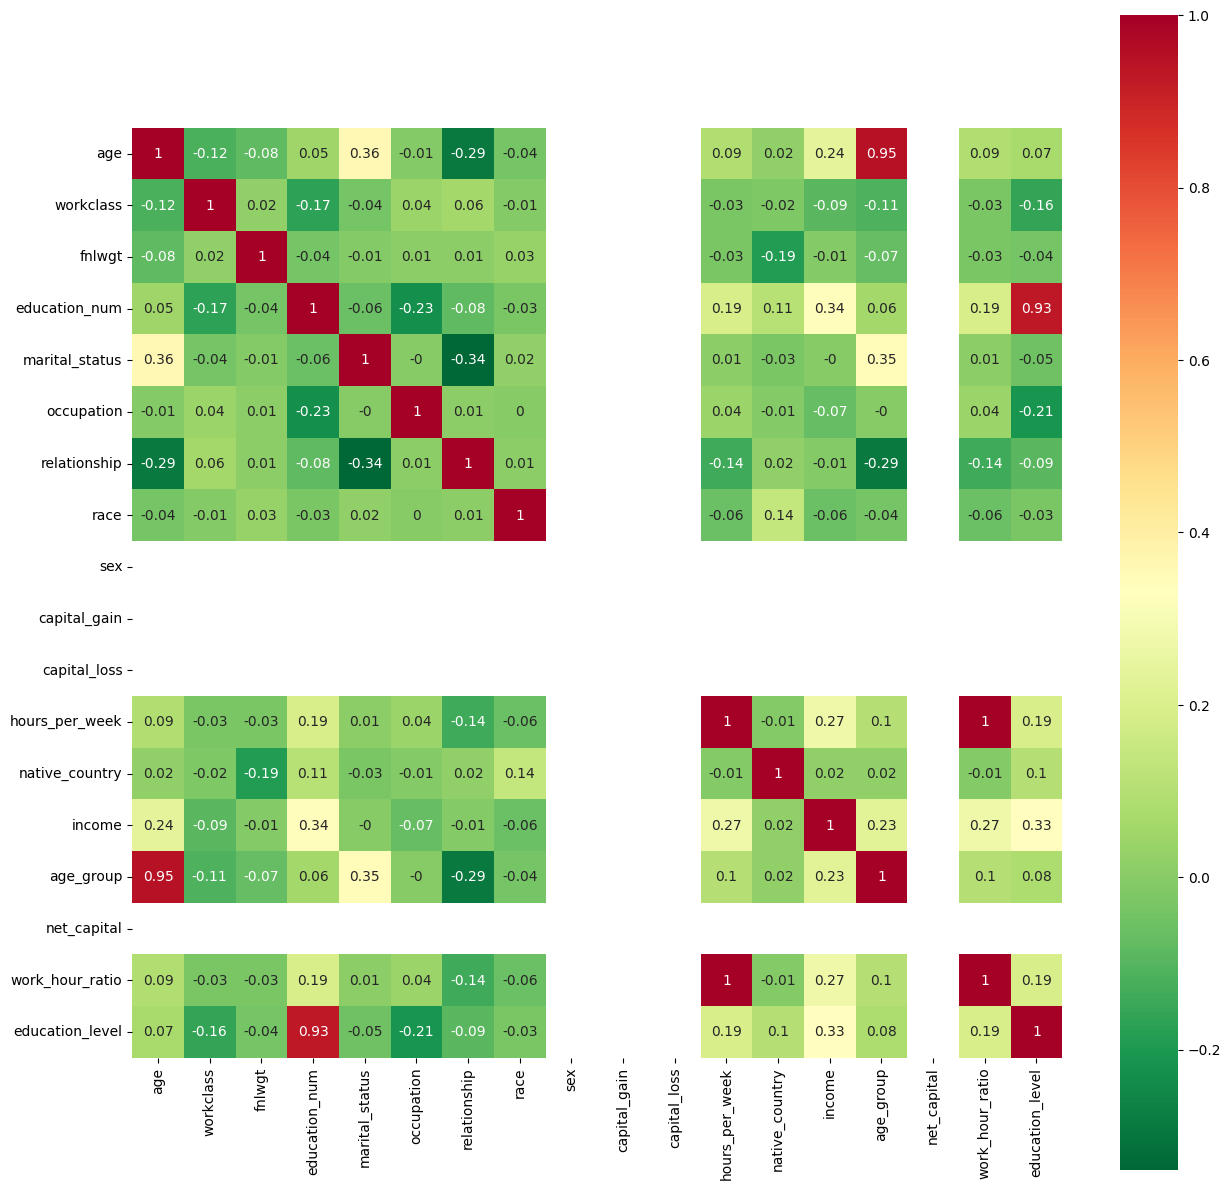

In [ ]:
# Corelation Heatmap
correlation = df.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

**Penghapusan Fitur Yang Bernilai Konstan**

In [ ]:
df = df.loc[:,df.apply(pd.Series.nunique) !=1]

In [ ]:
df

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,hours_per_week,native_country,income,age_group,work_hour_ratio,education_level
0,39.0,5.0,77516.0,13.0,0.0,1.0,1.0,1.0,40.0,NaN,0,3.0,0.970669,3.0
1,50.0,NaN,83311.0,13.0,1.0,2.0,2.0,1.0,32.5,NaN,0,4.0,0.788668,3.0
2,38.0,7.0,215646.0,9.0,2.0,3.0,1.0,1.0,40.0,NaN,0,3.0,0.970669,2.0
3,53.0,7.0,234721.0,7.0,1.0,3.0,2.0,2.0,40.0,NaN,0,4.0,0.970669,1.0
4,28.0,7.0,338409.0,13.0,1.0,4.0,3.0,2.0,40.0,2.0,0,2.0,0.970669,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,7.0,257302.0,12.0,1.0,11.0,3.0,1.0,38.0,NaN,0,2.0,0.922135,2.0
32557,40.0,7.0,154374.0,9.0,1.0,10.0,2.0,1.0,40.0,NaN,1,3.0,0.970669,2.0
32558,58.0,7.0,151910.0,9.0,4.0,1.0,0.0,1.0,40.0,NaN,0,4.0,0.970669,2.0
32559,22.0,7.0,201490.0,9.0,0.0,1.0,4.0,1.0,32.5,NaN,0,2.0,0.788668,2.0


**Penghapusan Fitur Berkorelasi Tinggi**

In [ ]:
# Find and remove corelated features
def correlation(dataset, threshold):
  col_corr = set() #Set of all the names of correlation columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
        colname = corr_matrix.columns[i] # getting the name of column
        col_corr.add(colname)
  return col_corr

In [ ]:
data_tanpa_fitur = df.drop('income', axis=1)

In [ ]:
corr_features = correlation(data_tanpa_fitur, 0.8)
print('correlation_features: ', len(set(corr_features)))
print(corr_features)

correlation_features:  3
{'age_group', 'education_level', 'work_hour_ratio'}


In [ ]:
# Remove correlated features
df.drop(labels=corr_features, axis=1, inplace=True)

<ipython-input-51-91ba72ac2207>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels=corr_features, axis=1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32508 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32508 non-null  float64
 1   workclass       29968 non-null  float64
 2   fnlwgt          32508 non-null  float64
 3   education_num   32508 non-null  float64
 4   marital_status  32485 non-null  float64
 5   occupation      32499 non-null  float64
 6   relationship    32508 non-null  float64
 7   race            32197 non-null  float64
 8   hours_per_week  32508 non-null  float64
 9   native_country  2723 non-null   float64
 10  income          32508 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 3.0 MB


In [ ]:
df.describe()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,hours_per_week,native_country,income
count,32508.000000,29968.000000,32508.000000,32508.000000,32485.000000,32499.000000,32508.000000,32197.000000,32508.000000,2723.000000,32508.000000
mean,38.573397,6.496296,186773.668174,10.125185,1.084193,5.186129,1.982097,1.195049,41.208702,13.795813,0.241018
std,13.551409,1.179286,95073.478554,2.459865,1.254112,2.958558,1.272457,0.567833,6.185439,10.134084,0.427708
min,17.000000,0.000000,12285.000000,4.500000,0.000000,1.000000,0.000000,1.000000,32.500000,2.000000,0.000000
25%,28.000000,7.000000,117801.000000,9.000000,0.000000,3.000000,1.000000,1.000000,40.000000,5.000000,0.000000
50%,37.000000,7.000000,178348.500000,10.000000,1.000000,5.000000,2.000000,1.000000,40.000000,11.000000,0.000000
75%,48.000000,7.000000,236979.000000,12.000000,1.000000,7.000000,2.000000,1.000000,45.000000,22.000000,0.000000
max,78.000000,7.000000,415887.000000,16.000000,6.000000,14.000000,5.000000,5.000000,52.500000,40.000000,1.000000


**Cek Kembali Korelasi**

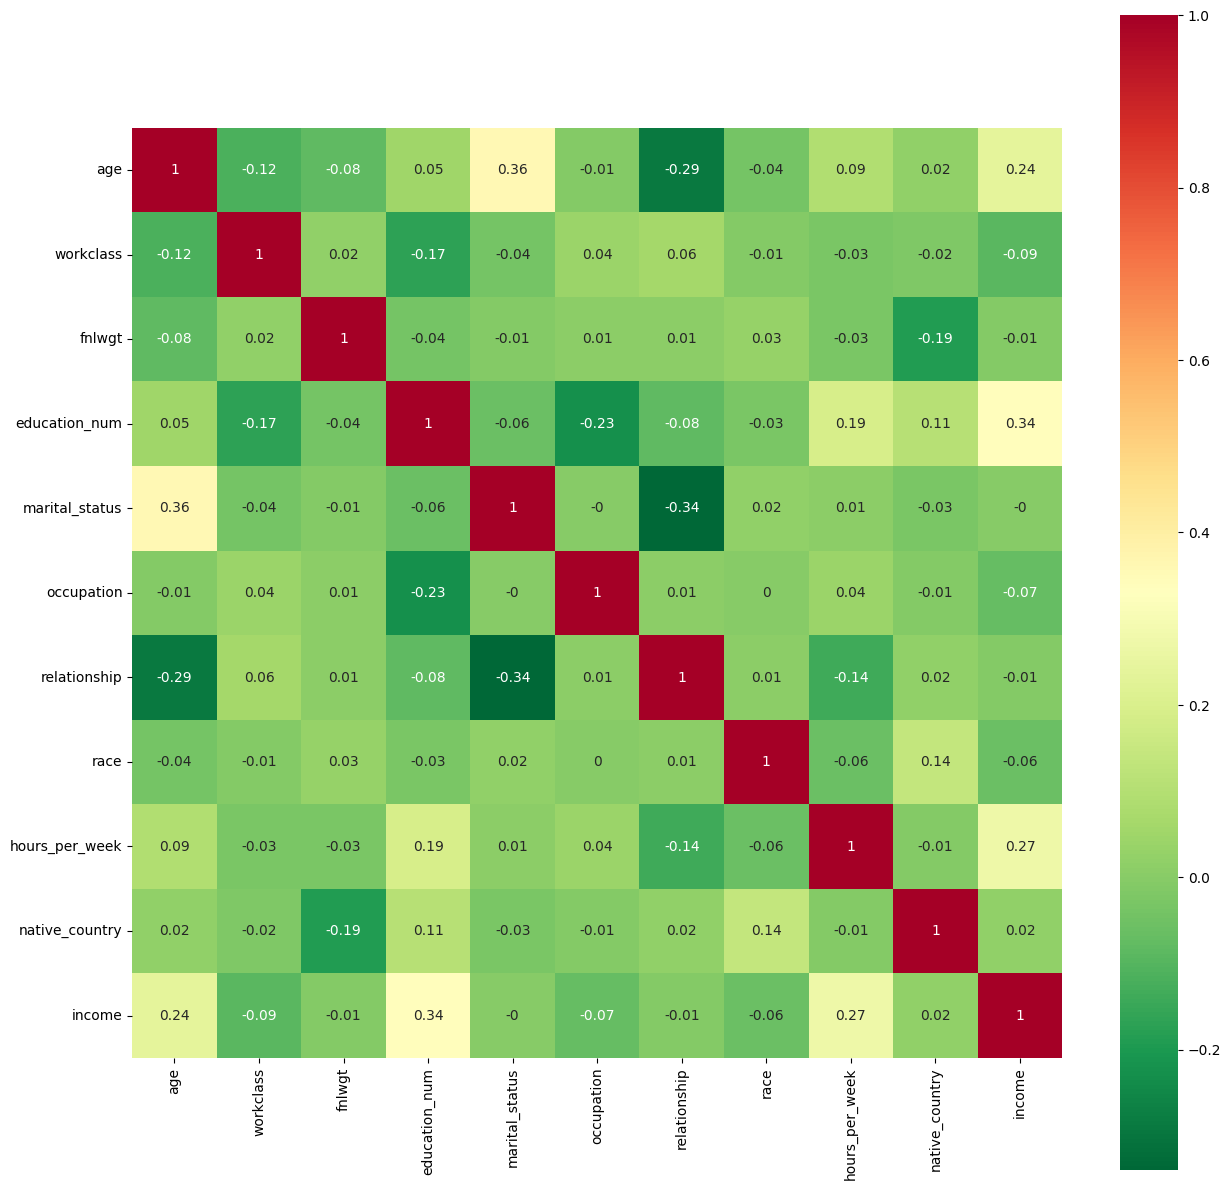

In [ ]:
# Correlation Heatmap
correlation = df.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

**UNIT 7: Membangun Model**

In [ ]:
from sklearn.model_selection import train_test_split
# Pisahkan fitur dan target
x = df.drop('income', axis=1)
y = df['income']

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
random_state=42, stratify=y)

**Membangun dengan decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score,precision_score, classification_report, confusion_matrix

# Inisialisasi model
dt_model = DecisionTreeClassifier(random_state=42)

# Latihan model
dt_model.fit(x_train, y_train)

# Prediksi
y_pred_dt = dt_model.predict(x_test)

# Evaluasi
print('Decision Tree Performance:')
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Precision:', precision_score(y_test,y_pred_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_dt, average='micro'))
print('\nClassification Report:')
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 0.7653029836973239
Precision: 0.7653029836973239
Recall: 0.7653029836973239

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4935
           1       0.51      0.54      0.52      1567

    accuracy                           0.77      6502
   macro avg       0.68      0.69      0.68      6502
weighted avg       0.77      0.77      0.77      6502



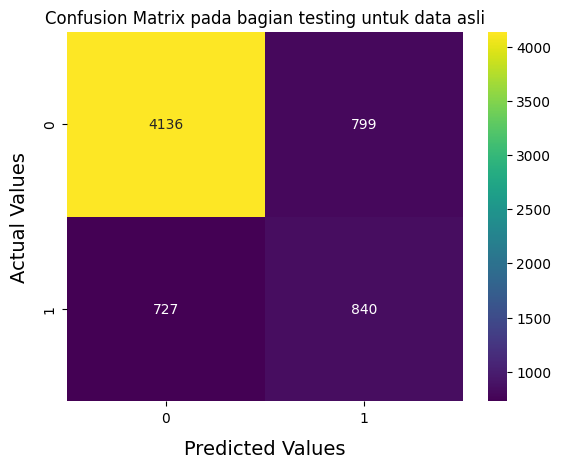

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt), annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

**Feature Importance**

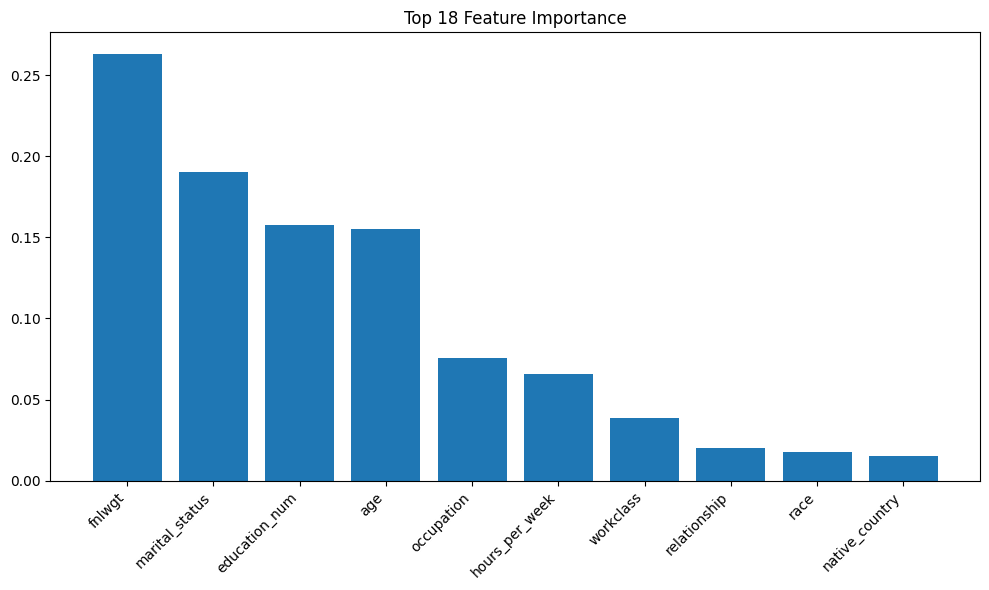

In [ ]:
feature_importance = pd.DataFrame({'feature': x.columns, 'importance': dt_model.
feature_importances_})
feature_importance = feature_importance.sort_values('importance',
ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'][:18], feature_importance['importance']
[:18])
plt.title('Top 18 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid,
cv=5, scoring='accuracy')

# Pencarian hyperparameter terbaik
grid_search.fit(x_train, y_train)

#Tampilkan parameter terbaik
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score:', grid_search.best_score_)

# Gunakan model terbaik
best_dt_model = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_best_dt = best_dt_model.predict(x_test)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.8277320090678447


In [ ]:
# Evaluasi model terbaik
print('\nBest Decision Tree Performance:')
print('Accuracy:', accuracy_score(y_test, y_pred_best_dt))
print('Precision:', precision_score(y_test,y_pred_best_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_best_dt, average='micro'))
print('\nClassification Report:')
print(classification_report(y_test, y_pred_best_dt))


Best Decision Tree Performance:
Accuracy: 0.8272839126422639
Precision: 0.8272839126422639
Recall: 0.8272839126422639

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4935
           1       0.69      0.51      0.59      1567

    accuracy                           0.83      6502
   macro avg       0.77      0.72      0.74      6502
weighted avg       0.82      0.83      0.82      6502



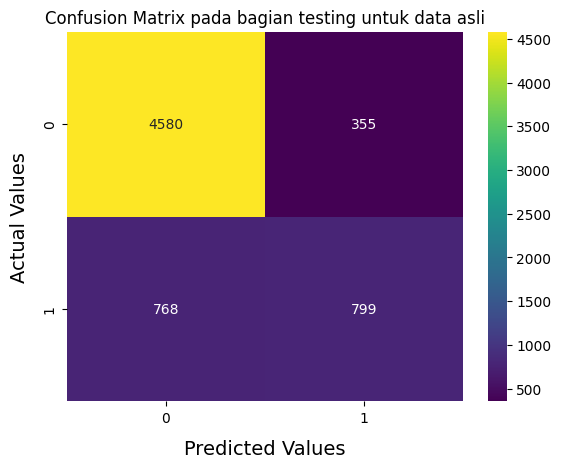

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_best_dt),annot=True,cmap='viridis',
fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

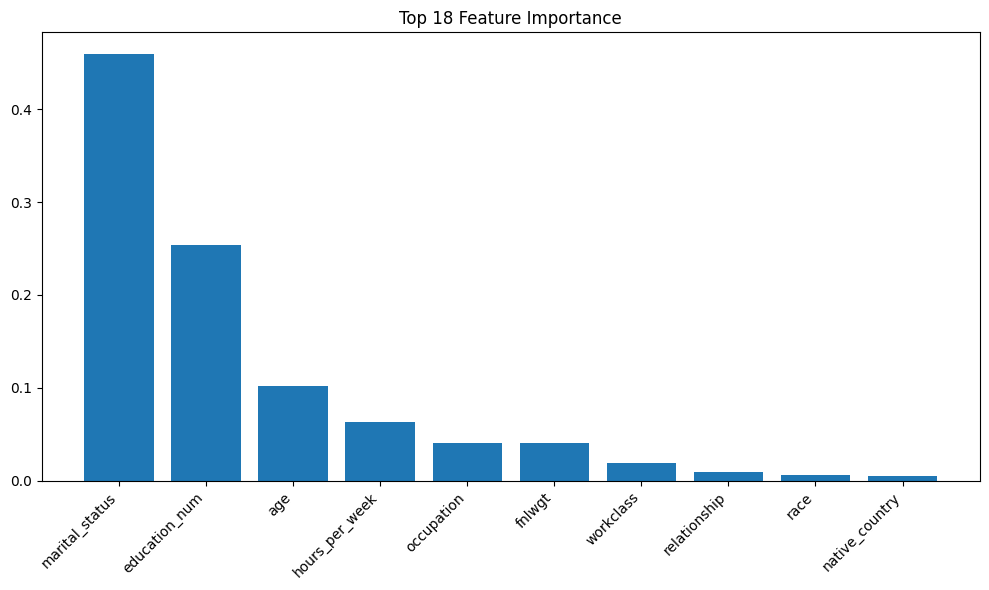

In [ ]:
feature_importance = pd.DataFrame({'feature': x.columns, 'importance':
best_dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance',
ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'][:18], feature_importance['importance']
[:18])
plt.title('Top 18 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Simpan Model Terbaik**

In [ ]:
import joblib

# Simpan model terbaik
joblib.dump(best_dt_model, f'{folder_name}/best_income_predictor_model.joblib')
print("Model terbaik telah disimpan sebagai 'best_income_predictor_model.joblib'")

Model terbaik telah disimpan sebagai 'best_income_predictor_model.joblib'


**Underfitting**

Membandingkan Akurasi Training vs Testing

In [ ]:
from sklearn.metrics import accuracy_score

# Untuk model Descision Tree terbaik
y_train_pred = best_dt_model.predict(x_train)
y_test_pred = best_dt_model.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)

Training Accuracy: 0.8464200569099438
Testing Accuracy: 0.8272839126422639


Learning Curve

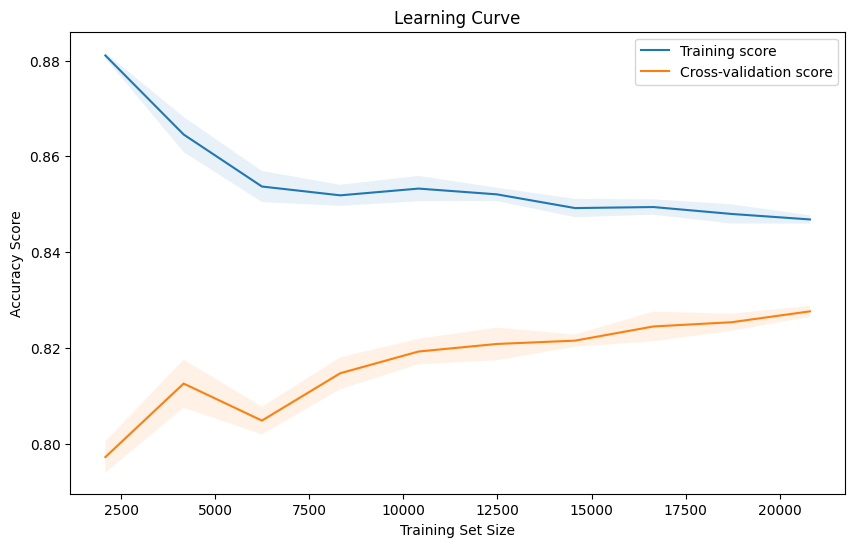

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_dt_model, x_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_dt_model, x_train, y_train, cv=5)
print('Cross-validation scores:', cv_scores)
print('Mean CV score:', np.mean(cv_scores))
print('Standard deviation of CV scores:', np.std(cv_scores))

Cross-validation scores: [0.82910419 0.82561046 0.82887906 0.82772544 0.8273409 ]
Mean CV score: 0.8277320090678447
Standard deviation of CV scores: 0.0012532036779161985


Complexity Curve (untuk decision tree)

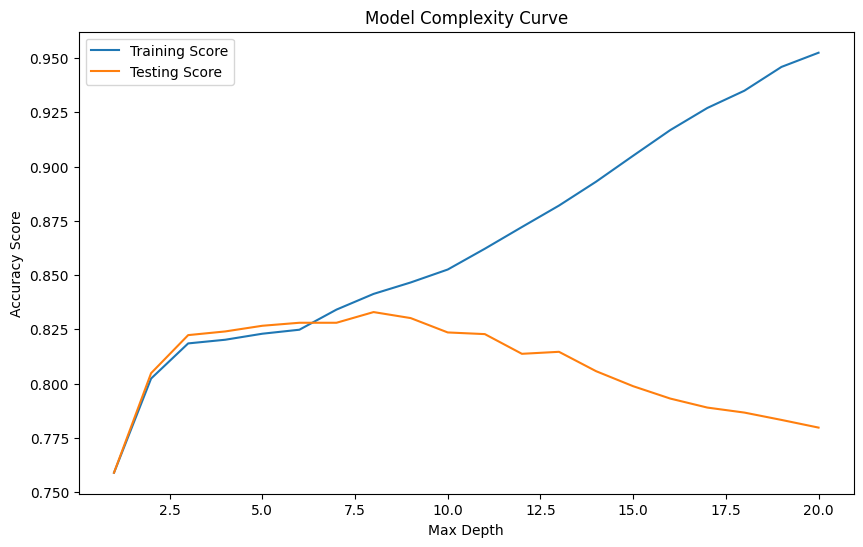

In [ ]:
max_depths = range(1, 21)  #digunakan untuk nilai integer dari 1 sampai 3
train_scores = []
test_scores = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(x_train, y_train)
    train_scores.append(accuracy_score(y_train, dt.predict(x_train)))
    test_scores.append(accuracy_score(y_test, dt.predict(x_test)))


plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Training Score')
plt.plot(max_depths, test_scores, label='Testing Score')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Model Complexity Curve')
plt.legend()
plt.show()

**Visualisasi Decision Tree versi Standar dengan max_depth=5**

In [ ]:
from sklearn.tree import plot_tree

Gambar pohon keputusan telah disimpan sebagai decision_tree_visualization.png


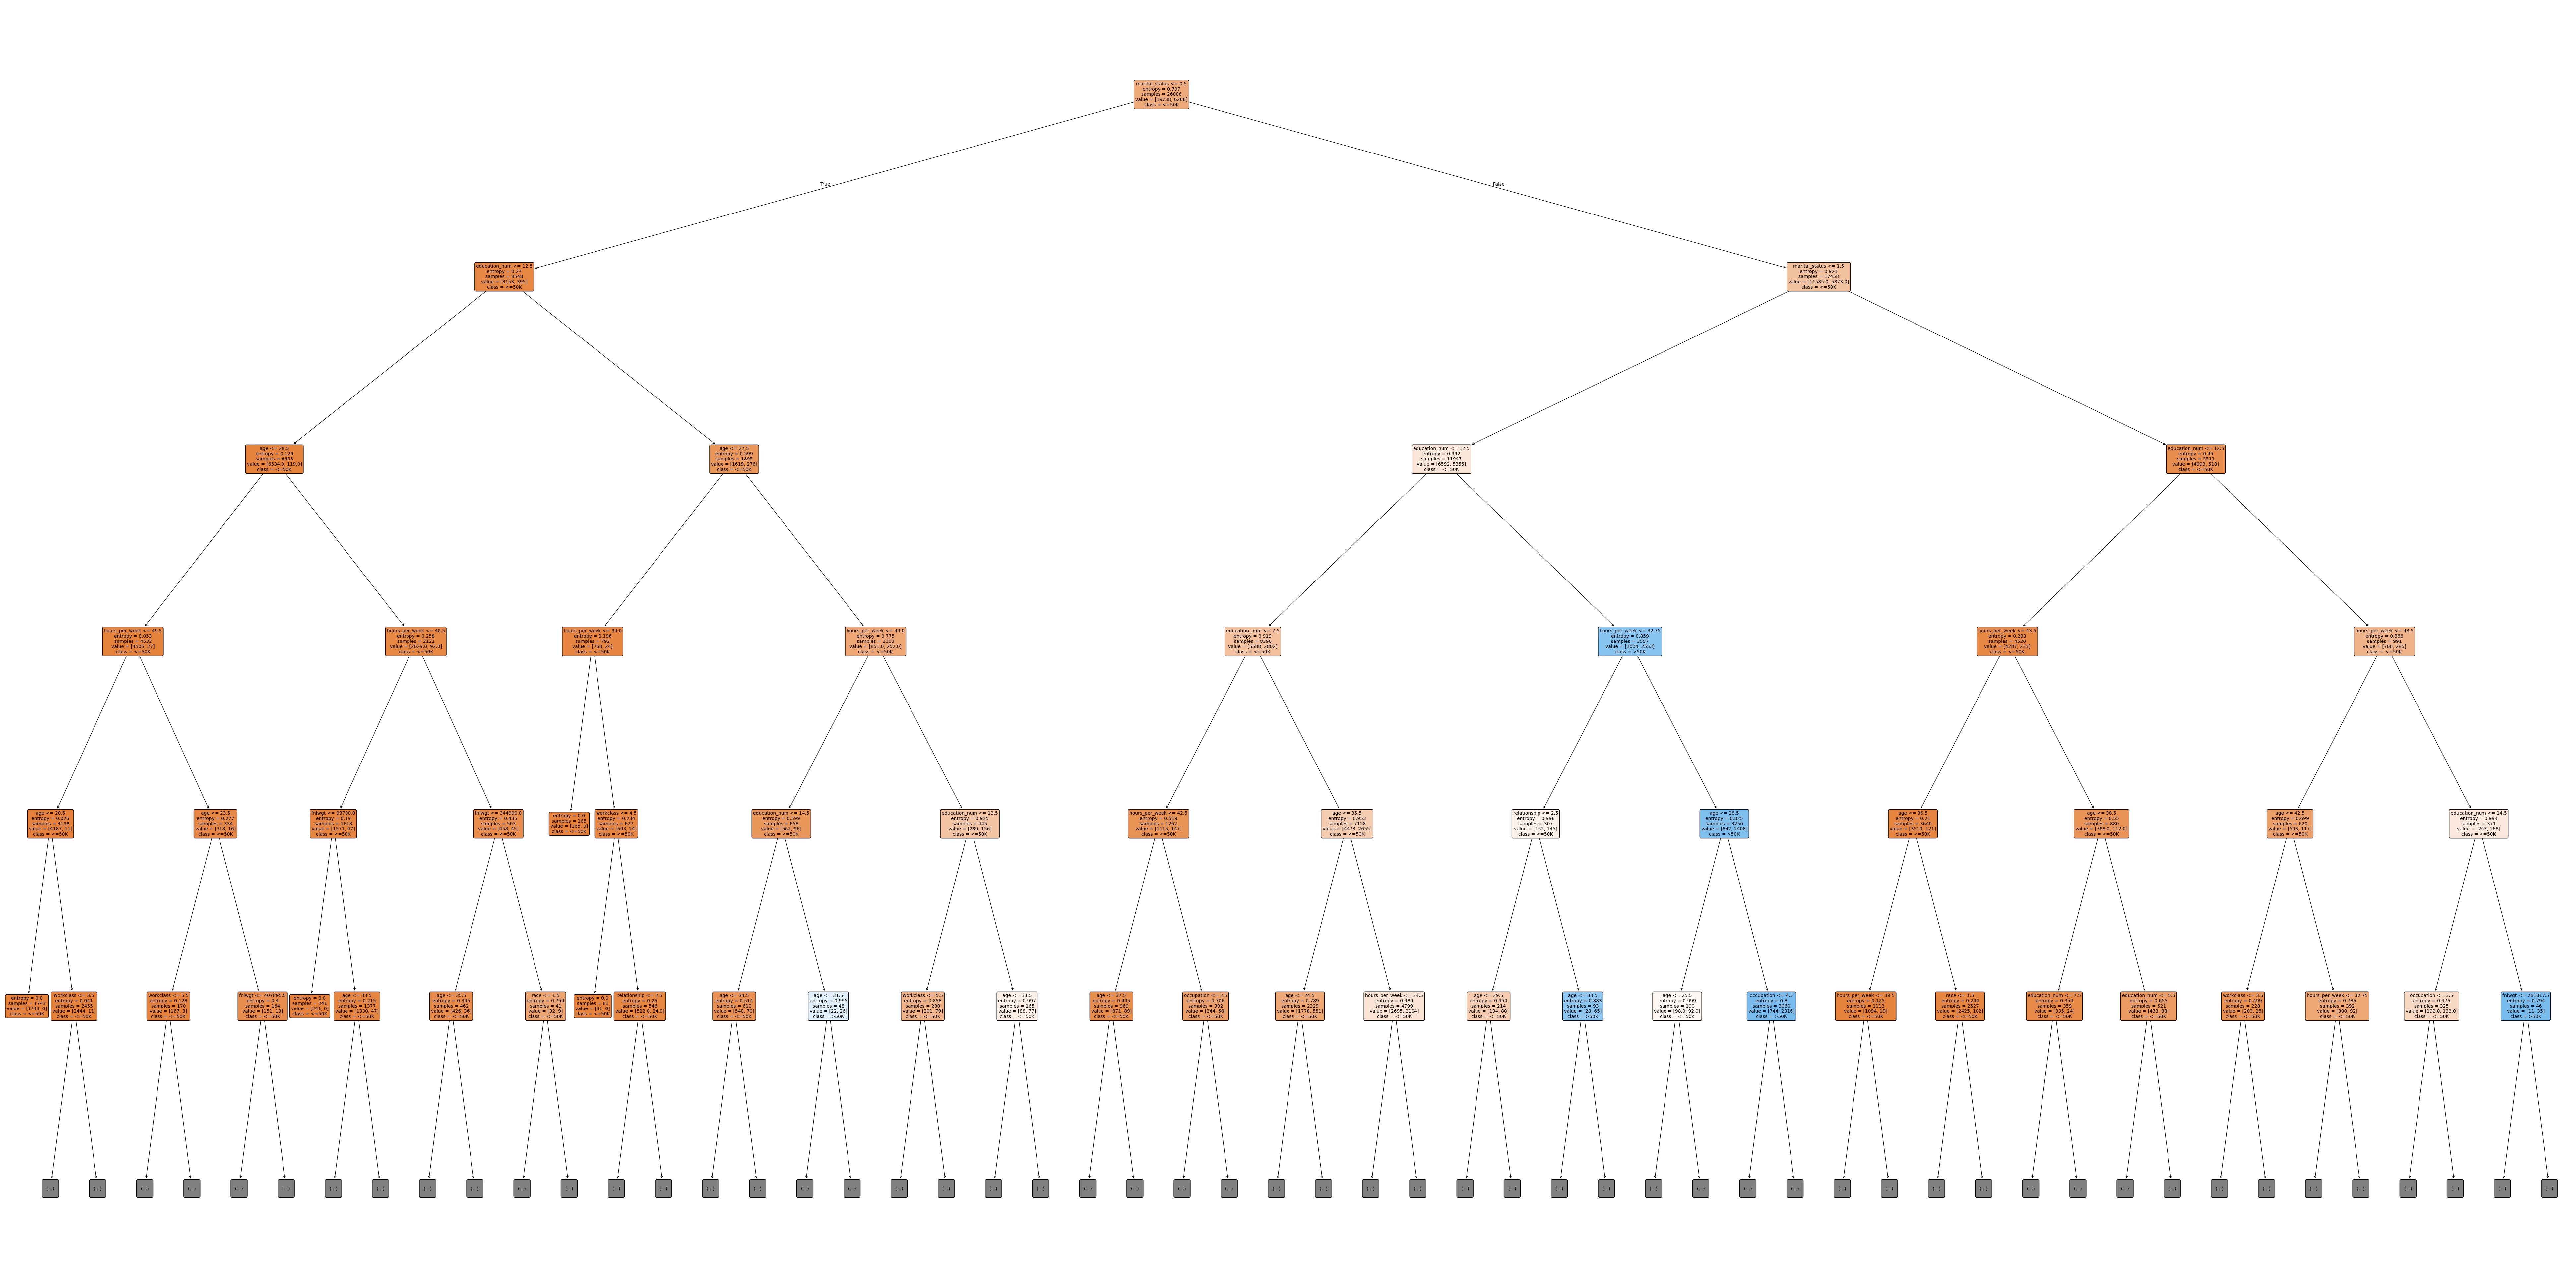

In [ ]:
# Buat gambar dengan ukuran yang sangat besar - disini maxdepth dibuat 5 agar lebih cepat terbuat
plt.figure(figsize=(100, 50))  # Ukuran dalam inci

# Plot pohon keputusan
plot_tree(best_dt_model, feature_names=x.columns, class_names=['<=50K', '>50K'],
           filled=True, rounded=True, fontsize=10, max_depth=5)

# Simpan gambar dengan DPI tinggi
plt.savefig(f'{folder_name}/decision_tree_visualization.png', dpi=300,
bbox_inches='tight')

print('Gambar pohon keputusan telah disimpan sebagai decision_tree_visualization.png')